# Lab1 (Student version)

We can use the following libraries.

In [2]:
import matplotlib.pyplot as plt
import math
import sys
print(sys.version)
import csv

3.9.2 (default, Feb 28 2021, 17:03:44) 
[GCC 10.2.1 20210110]


## Exercise 1: getting things started with undirected graphs

### Question 1

Create manually an unidrected graph (with approximately a dozen nodes) test_graph.txt and store them in a text file in the format (for each line):

x    y 

Where x and y are separated with a tabulation. You will use them to test your codes.

### Question 2

Download the following graphs (be careful these datasets are quite heavy):

http://snap.stanford.edu/data/com-Amazon.html

http://snap.stanford.edu/data/com-LiveJournal.html

Also, download the graph bugged_graph.txt from http://lioneltabourier.fr/teaching_en.html

These graphs and test_graph.txt allow you to check the results of your programs.


### Question 3

Make a program which reads a graph from a text file and counts the number of nodes and edges in a graph (without storing it in memory). 

In [ ]:
def calculate_nodes_edges(filename, delimiter):
    node_number=0
    edge_number=0
    nodes=[]
    with open(filename) as file:
        file = csv.reader(file, delimiter=delimiter)
        for line in file:
            if line[0]!="#":
                edge_number+=1
                if line[0] not in nodes:
                    nodes.append(line[0])
                    node_number+=1
                if line[1] not in nodes:
                    nodes.append(line[1])
                    node_number+=1
            
                            
    return node_number,edge_number

node_number,edge_number=calculate_node_edge("C:/Users/abdel/Desktop/Cours5/NAM/LABs/file.txt","\t")
print("The number of nodes in this graph is :",node_number)
print("The number of edges in this graph is :",edge_number)

#We have created a function that takes the filename and the delimiter as parameters, it open the file and uses the csv package
#to parse each line of the file in a list of strings based on the delimiter. For each line in the file that does not start with #, 
# the edge_number variable which contains the number edges is increased. And to calculate the number of nodes, 
# we load only the different nodes of the graph in a list and count how many nodes are in that list. 
#Finaly, this function will return two values: the number of nodes and the number of edges.


### Question 3bis

Apply the previous code to bugged_graph.txt and then look at the content of the file. Does it correspond to the expected result? Explain in one sentence what the problem is.

In [ ]:
node_number,edge_number=calculate_node_edge("C:/Users/abdel/Desktop/Cours5/NAM/LABs/bugged_graph.txt"," ")
print("The number of nodes in this graph is :",node_number)
print("The number of edges in this graph is :",edge_number)

#No it does not correspond to the expected result, beacuse when applying the previous function to that file, we are
# seeing that some edges are counted more times. The problems are loops and duplicated edges.

### Question 4

Make a program which counts the degree (i.e. the number of edges) of a node of a graph (without storing it in memory).

In [ ]:
def list_node(filename,delimiter):
    nodes=[]
    with open(filename) as file:
        file = csv.reader(file, delimiter=delimiter)
        for line in file:
            if line[0] != "#":
                if line[0] not in nodes:
                    nodes.append(line[0])
                if line[1] not in nodes:
                    nodes.append(line[1])
    return nodes

def degree_list(filename,nodes,delimiter):
    degree={}
    for node in nodes:
        count_degree = 0
        degree[node]=[]
        with open(filename) as file:
            file = csv.reader(file, delimiter=delimiter)
            for line in file:
                if line[0] != "#":
                    if line[0] == node or line[1] == node:
                        if line[0] != line[1]:
                            count_degree += 1
            degree[node]=count_degree
    return degree

degrees = degree_list("graph.txt",list_node("graph.txt"," ")," ")

for key,value in degrees.items():
    print("The degree of node ",key,"is :", value)

# We have created two functions, one function (list_node) is used to load only the different nodes of a graph, and the second
# function (degree_list) takes the filename, the list of nodes and the delimiter of the file and calculate
# the degree of each node in the graph and return a dictionnary which contains all the nodes and there degrees.

## Exercise 2: loading a graph in memory

### Question 5

Make a program which reads a graph from a text file and load it as a python dictionary of lists. 
This implementation of the adjacency list format will be the standard format that we will use to store a graph in this course.

In [ ]:
def load_graph(filename, delimiter):
    graph={}
    with open(filename) as file:
        file = csv.reader(file, delimiter=delimiter)
        for line in file:
            if line[0] not in graph:
                graph[line[0]] = []
            graph[line[0]].append(line[1])
            
        
    return graph
graph = load_graph("C:/Users/abdel/Desktop/Cours5/NAM/LABs/file.txt","\t")
print(graph)

#We have created a function that takes the filename and delimiter as parameters, this function opens a file 
# and uses csv package to parse each line of the file in list of strings based on the delimiter, for each line we verify if the 
# fisrt element of the line is not in the graph dictionary, we add it to the dictionary as a key and create an empty list as value
# of that key that is used to store the neighbors of that node (key).

### Question 6

Make a program that deletes the self-loops and duplicated edges existing in the graph and writes it in a new text file. 

Use it on bugged_graph.txt to create a graph debugged_graph.txt without self-loops and duplicated edges.

In [ ]:
def delete(filename, delimiter):
    new_graph={}
    with open(filename) as file:
        file = csv.reader(file, delimiter=delimiter)
        for line in file:
            if line[0] not in new_graph:
                new_graph[line[0]] = []
            if line[0]!=line[1] and line[1] not in new_graph[line[0]] :
                new_graph[line[0]].append(line[1])
    
    with open("C:/Users/abdel/Desktop/Cours5/NAM/LABs/debugged_graph.txt", "w") as file:
        writer = csv.writer(file, delimiter=delimiter)
        for key, values in new_graph.items():
            for value in values:
                line = [key,value]
                writer.writerow(line)
                
            
    
    return new_graph

new_graph = delete("C:/Users/abdel/Desktop/Cours5/NAM/LABs/bugged_graph.txt"," ")
print(new_graph)

#Here, we have a created a function that reads a graph from a text file, deletes the loops and duplicated edges in that graph.
# Then it stores the new graph in a new text file.

### Question 7

Try the data structure of Question 5 on the two graphs downloaded in Question 2, can you load them in memory? Can you print them on the screen?

Conclude on the scalability (meaning what graph size can you handle with this data structure).

In [ ]:
graph = load_graph("C:/Users/abdel/Desktop/Cours5/NAM/LABs/com-amazon.ungraph.txt","\t")
print(graph)
# We can load them but we cannot print theme. The problem is that the amount of data loaded exceeds the IOPS rate. So, using
# the dictionary of lists to loads graphs is not scalable, we can use this data structure to load only small graphs but not
# large graphs. 

## Exercise 3: degree distribution

### Question 8
Create a program which computes the degree distribution of a graph, store it in a python dictionary of the form:

deg: number of occurrences

In [ ]:
degrees = degree_list("graph.txt",list_node("graph.txt"," ")," ")
# We have already created a function that calculates the degree of all the nodes of a graph in the question 4 of the Exercice 1.


### Question 9

Plot the degree distribution in log scale (using matplotlib for example).

In [ ]:
def degree_distribution(degrees):
    plt.scatter(degrees.keys(), degrees.values())
    plt.show()
    
degree_distribution(degrees):

## Exercise 3: the case of directed graphs

### Question 10

Download the following directed graph:

http://konect.cc/networks/web-Google/

By adapting your codes for undirected graphs to directed graphs, load it in memory into a double ajacency list format.

In [4]:
def load_directed(filename, delimiter):
    graph_in = {}
    graph_out = {}
    with open(filename) as file:
        file = csv.reader(file, delimiter=delimiter)
        for line in file:
            if line[0]!="#":
                if line[0] not in graph_out:
                    graph_out[line[0]]=[]
                graph_out[line[0]].append(line[1])
                if line[1] not in graph_in:
                    graph_in[line[1]]=[]
                graph_in[line[1]].append(line[0])
    return graph_in,graph_out

graph_in,graph_out = load_directed("test_graph.txt","\t")
print("The out adjacency list is: ",graph_out)
print("The in adjacency list is: ",graph_in)

# We have created a function that reads a directed graph from a file, for that this function returns two dictionaries of list,
# one dictionary (graph_in) contains the nodes and incoming edges, and the other dictionary (graph_out) contains the nodes and
# the outgoing edges.


{'2': ['1', '4'], '3': ['1', '2', '4'], '4': ['1', '2'], '1': ['2', '3']}
{'1': ['2', '3', '4'], '2': ['1', '3', '4'], '3': ['1'], '4': ['3', '2']}


### Question 11

Plot in log-log scale both the in-degree distribution and the out-degree distribution of this graph.

In [6]:
def calculate_degree(graph_in, graph_out):
    degree_in = {}
    degree_out = {}
    for node, neighbors in graph_in.items():
        degree_in[node] = len(neighbors)
    for node, neighbors in graph_out.items():
        degree_out[node] = len(neighbors)
        
    return degree_in, degree_out
degree_in, degree_out = calculate_degree(graph_in, graph_out)
print(degree_in)
print(degree_out)

# We created a fucntion that takes the in adjacency list and the out adjacency list as parameters, it calculates
# the in-degree for the in adjacency list and the out-degree for the out adjacency list and returns two dictionaries
# one contains the nodes and there in-degree, and the other contains the nodes and there out-degree.


{'2': 2, '3': 3, '4': 2, '1': 2}
{'1': 3, '2': 3, '3': 1, '4': 2}


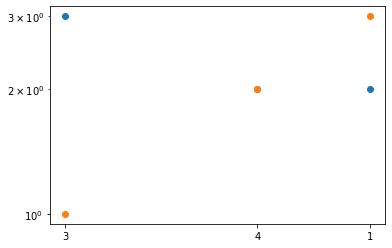

In [10]:
def plot_degree_distDirected(graph_in,graph_out,log=True):
    if log:
        plt.yscale("log")
        plt.xscale("log")
    degree_in,degree_out = calculate_degree(graph_in,graph_out)
    plt.scatter(degree_in.keys(), degree_in.values())
    plt.scatter(degree_out.keys(), degree_out.values())
    plt.show()
    
    
plot_degree_distDirected(graph_in,graph_out)

#We created a function that takes the double adjacency list, it calls the function which is reponsible for calculating the 
# in-degree and out-degree, the result will be used to calculate the in-degree distribution and the out-degree distribution.
# Both of theme are displayed.